# Fuel Consumption Prediction
Made by Praneesh Sharma


## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt #to visualize data
import seaborn as sns #to visualize data

from sklearn.preprocessing import StandardScaler #to scale the data
from sklearn.model_selection import train_test_split #to spilt the data into test and train sets

from sklearn.linear_model import LinearRegression #linear regression library
from sklearn.tree import DecisionTreeRegressor #decision tree library

from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

## Data Cleaning

In [2]:
#importing the dataset
df = pd.read_csv("../input/vehicle-fuelconsumption/competition_edu_dataset.csv")

In [3]:
#displaying the dataset
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,13.0,8,400.0,190,4422,12.5,72,1,chrysler newport royal
1,13.0,8,350.0,145,3988,13.0,73,1,chevrolet malibu
2,15.5,8,350.0,170,4165,11.4,77,1,chevrolet monte carlo landau
3,17.0,6,231.0,110,3907,21.0,75,1,buick century
4,13.0,8,318.0,150,3755,14.0,76,1,dodge d100
...,...,...,...,...,...,...,...,...,...
295,22.0,6,232.0,112,2835,14.7,82,1,ford granada l
296,18.0,6,250.0,78,3574,21.0,76,1,ford granada ghia
297,18.1,8,302.0,139,3205,11.2,78,1,ford futura
298,15.0,8,318.0,150,4135,13.5,72,1,plymouth fury iii


In [4]:
# displaying the number of rows and columns
z=df.shape
print("Number of columns: ", z[0])
print("Number of rows: ", z[1])

Number of columns:  300
Number of rows:  9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           300 non-null    float64
 1   Cylinders     300 non-null    int64  
 2   Displacement  300 non-null    float64
 3   Horsepower    300 non-null    object 
 4   Weight        300 non-null    int64  
 5   Acceleration  300 non-null    float64
 6   Model Year    300 non-null    int64  
 7   Origin        300 non-null    int64  
 8   Car Name      300 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 21.2+ KB


##### There are 300 entries in total and 300 non-null count in each column. Therefore, there are no null values in the dataset.
##### The type of the 'horsepower' column is shown as object, which means there are some non-float values in that column.

In [6]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,23.679333,5.430000,192.118333,2952.820000,15.567000,76.043333,1.563333
std,7.803218,1.703361,104.711230,836.196298,2.811469,3.782744,0.792517
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,98.000000,2219.750000,13.875000,73.000000,1.000000
50%,23.000000,4.000000,144.500000,2789.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,263.250000,3565.750000,17.125000,79.000000,2.000000
max,44.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
#Let's review the relationship between the columns to examine the correlations between the features and the target.
numeric_cols = df.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print ('Top 5 Correlated Features with MPG:'), print (corr['MPG'].sort_values(ascending = False)[:5], '\n')
print ('Top 5 Uncorrelated Features with MPG:'), print (corr['MPG'].sort_values(ascending = False)[-5:])

Top 5 Correlated Features with MPG:
MPG             1.000000
Model Year      0.575630
Origin          0.561089
Acceleration    0.453749
Cylinders      -0.798505
Name: MPG, dtype: float64 

Top 5 Uncorrelated Features with MPG:
Origin          0.561089
Acceleration    0.453749
Cylinders      -0.798505
Displacement   -0.818860
Weight         -0.837118
Name: MPG, dtype: float64


(None, None)

Text(0.5, 0, 'Acceleration')

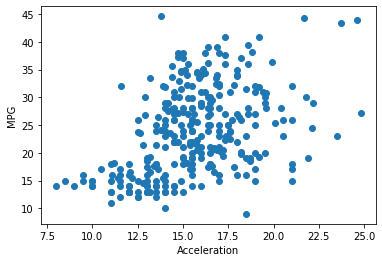

In [8]:
plt.scatter(x = df['Acceleration'], y = df['MPG'])
plt.ylabel('MPG')
plt.xlabel('Acceleration')

##### to a certain extent, MPG increases with acceleration.

Text(0.5, 0, 'Weight')

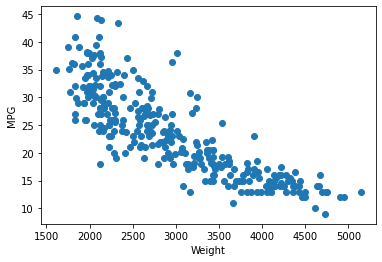

In [9]:
plt.scatter(x = df['Weight'], y = df['MPG'])
plt.ylabel('MPG')
plt.xlabel('Weight')

##### MPG decreases with an increase in weight.
##### We can conclude that: the more the weight, the less the fuel efficiency.

<AxesSubplot:xlabel='MPG', ylabel='Density'>

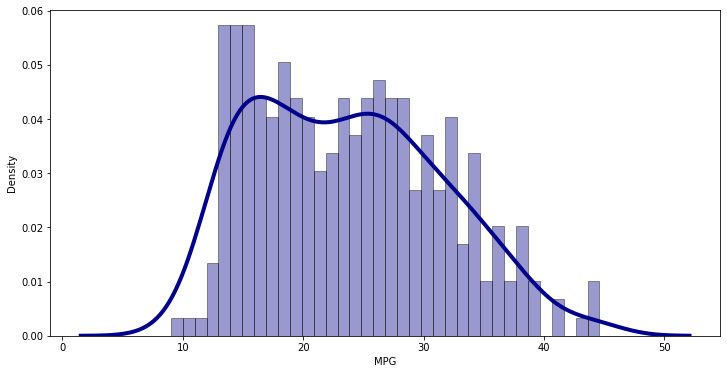

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(12,6))
sns.distplot(df['MPG'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

##### This is a right, ie, positive skewed graph.

### Preprocessing

In [11]:
df #original dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,13.0,8,400.0,190,4422,12.5,72,1,chrysler newport royal
1,13.0,8,350.0,145,3988,13.0,73,1,chevrolet malibu
2,15.5,8,350.0,170,4165,11.4,77,1,chevrolet monte carlo landau
3,17.0,6,231.0,110,3907,21.0,75,1,buick century
4,13.0,8,318.0,150,3755,14.0,76,1,dodge d100
...,...,...,...,...,...,...,...,...,...
295,22.0,6,232.0,112,2835,14.7,82,1,ford granada l
296,18.0,6,250.0,78,3574,21.0,76,1,ford granada ghia
297,18.1,8,302.0,139,3205,11.2,78,1,ford futura
298,15.0,8,318.0,150,4135,13.5,72,1,plymouth fury iii


In [12]:
data = df.copy()  # making a copy of the dataframe so that the changes made here wont affect the original dataset

In [13]:
data #copied dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,13.0,8,400.0,190,4422,12.5,72,1,chrysler newport royal
1,13.0,8,350.0,145,3988,13.0,73,1,chevrolet malibu
2,15.5,8,350.0,170,4165,11.4,77,1,chevrolet monte carlo landau
3,17.0,6,231.0,110,3907,21.0,75,1,buick century
4,13.0,8,318.0,150,3755,14.0,76,1,dodge d100
...,...,...,...,...,...,...,...,...,...
295,22.0,6,232.0,112,2835,14.7,82,1,ford granada l
296,18.0,6,250.0,78,3574,21.0,76,1,ford granada ghia
297,18.1,8,302.0,139,3205,11.2,78,1,ford futura
298,15.0,8,318.0,150,4135,13.5,72,1,plymouth fury iii


In [14]:
(data == "?").sum(axis=0)
#the horsepower column had the type object, this is why

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car Name        0
dtype: int64

In [15]:
data['Horsepower'] = data['Horsepower'].replace('?', np.NaN).astype(float) #replacing the ? with NaN values as type float
data['Horsepower'] = data['Horsepower'].fillna(data['Horsepower'].mean())  #filling the missing NaN cells with the mean value of the horsepower column

In [16]:
len(data['Car Name'].unique()) 

244

There are some duplicates in the 'Car Name' column

To perform one hot encoding of the Car Names, only the first word, ie, the company needs to be taken.

In [17]:
import re #takes a particular part of a string from a column name

#creating a Company column
data['Company'] = df['Car Name'].apply(lambda x: re.search(r'^\w+', x).group(0))
#dropping the Car Name column
data = data.drop('Car Name', axis = 1)

data #modified dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Company
0,13.0,8,400.0,190.000000,4422,12.5,72,1,chrysler
1,13.0,8,350.0,145.000000,3988,13.0,73,1,chevrolet
2,15.5,8,350.0,170.000000,4165,11.4,77,1,chevrolet
3,17.0,6,231.0,110.000000,3907,21.0,75,1,buick
4,13.0,8,318.0,150.000000,3755,14.0,76,1,dodge
...,...,...,...,...,...,...,...,...,...
295,22.0,6,232.0,112.000000,2835,14.7,82,1,ford
296,18.0,6,250.0,78.000000,3574,21.0,76,1,ford
297,18.1,8,302.0,139.000000,3205,11.2,78,1,ford
298,15.0,8,318.0,150.000000,4135,13.5,72,1,plymouth


In [18]:
data['Company'].value_counts()

ford          36
chevrolet     32
plymouth      22
amc           22
toyota        21
dodge         19
datsun        16
buick         14
pontiac       13
volkswagen    10
mercury        9
oldsmobile     8
fiat           8
honda          8
chrysler       6
peugeot        6
mazda          5
vw             5
volvo          4
saab           4
subaru         4
audi           4
renault        4
opel           3
mercedes       3
bmw            2
chevy          2
cadillac       2
maxda          2
chevroelt      1
vokswagen      1
capri          1
hi             1
toyouta        1
triumph        1
Name: Company, dtype: int64

There are some typos in the Company column.

In [19]:
#a dictionary with the error-correction as key-value pair
correction = {
    'toyouta' : 'toyota',
    'vokswagen' : 'volkswagen',
    'chevroelt' : 'chevrolet',
    'maxda' : 'mazda',
    'vw' : 'volkswagen'
}

data['Company'] = data['Company'].replace(correction) #replacing typos with correct spellings

In [20]:
data['Company'].value_counts()

ford          36
chevrolet     33
toyota        22
plymouth      22
amc           22
dodge         19
volkswagen    16
datsun        16
buick         14
pontiac       13
mercury        9
oldsmobile     8
honda          8
fiat           8
mazda          7
peugeot        6
chrysler       6
audi           4
renault        4
saab           4
volvo          4
subaru         4
mercedes       3
opel           3
bmw            2
chevy          2
cadillac       2
capri          1
hi             1
triumph        1
Name: Company, dtype: int64

In [21]:
len(data['Company'].value_counts()) == len(data['Company'].unique())

True

##### As you can see, all the typos have been removed

In [22]:
data['Cylinders'].unique()

array([8, 6, 4, 5, 3])

In [23]:
data['Origin'].unique()

array([1, 2, 3])

In [24]:
print(len(data['Cylinders'].unique()), len(data['Origin'].unique()), len(data['Company'].unique()))

5 3 30


##### Hence, the cylinderr, origin, and company columns have nominal values, and can be onehot encoded

In [25]:
nominal_dict = {
    'Cylinders' : 'Cyl',
    'Origin' : 'Orig',
    'Company' : 'Comp'
}

for column, prefix in nominal_dict.items():     #onehot encoding the nominal columns
    dummies = pd.get_dummies(data[column], prefix=prefix)
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(column, axis=1)

In [26]:
data #the new dataframe with onehot encoded columns

,MPG,Displacement,Horsepower,Weight,Acceleration,Model Year,Cyl_3,Cyl_4,Cyl_5,Cyl_6,...,Comp_peugeot,Comp_plymouth,Comp_pontiac,Comp_renault,Comp_saab,Comp_subaru,Comp_toyota,Comp_triumph,Comp_volkswagen,Comp_volvo
0,13.0,400.0,190.000000,4422,12.5,72,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13.0,350.0,145.000000,3988,13.0,73,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.5,350.0,170.000000,4165,11.4,77,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17.0,231.0,110.000000,3907,21.0,75,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,13.0,318.0,150.000000,3755,14.0,76,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,22.0,232.0,112.000000,2835,14.7,82,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
296,18.0,250.0,78.000000,3574,21.0,76,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
297,18.1,302.0,139.000000,3205,11.2,78,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,15.0,318.0,150.000000,4135,13.5,72,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


##### Now, we will seperate the column of the value to be predicted from the main dataframe

In [27]:
mpg = data['MPG'].copy()
data = data.drop('MPG', axis=1)

## Model Creation

### Splitting the data

In [28]:
X = data
Y = mpg
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=70)

In [29]:
X_train

,Displacement,Horsepower,Weight,Acceleration,Model Year,Cyl_3,Cyl_4,Cyl_5,Cyl_6,Cyl_8,...,Comp_peugeot,Comp_plymouth,Comp_pontiac,Comp_renault,Comp_saab,Comp_subaru,Comp_toyota,Comp_triumph,Comp_volkswagen,Comp_volvo
156,304.0,150.0,3433,12.0,70,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
112,305.0,130.0,3840,15.4,79,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
136,91.0,67.0,1850,13.8,80,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161,121.0,112.0,2868,15.5,73,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
263,390.0,190.0,3850,8.5,70,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,83.0,61.0,2003,19.0,74,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,360.0,150.0,3940,13.0,79,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
280,91.0,68.0,1970,17.6,82,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,90.0,48.0,2085,21.7,80,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Scaling the data

In [30]:
scaler = StandardScaler() #used the sklearn.preprocessing.StandardScaler to scale the train dataset
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns) #scaling the train dataset
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) #scaling the test dataset

In [31]:
 X_train #the scaled train dataset

,Displacement,Horsepower,Weight,Acceleration,Model Year,Cyl_3,Cyl_4,Cyl_5,Cyl_6,Cyl_8,...,Comp_peugeot,Comp_plymouth,Comp_pontiac,Comp_renault,Comp_saab,Comp_subaru,Comp_toyota,Comp_triumph,Comp_volkswagen,Comp_volvo
0,1.055309,1.198947,0.589879,-1.254086,-1.558652,-0.120386,-1.079328,-0.069171,-0.462464,1.658312,...,-0.139347,-0.267261,-0.211604,-0.120386,-0.120386,-0.098058,-0.256885,-0.069171,-0.246183,-0.069171
1,1.064711,0.666376,1.080565,-0.046510,0.828587,-0.120386,-1.079328,-0.069171,-0.462464,1.658312,...,-0.139347,-0.267261,-0.211604,-0.120386,-0.120386,-0.098058,-0.256885,-0.069171,-0.246183,-0.069171
2,-0.947151,-1.011225,-1.318611,-0.614781,1.093835,-0.120386,0.926503,-0.069171,-0.462464,-0.603023,...,-0.139347,-0.267261,-0.211604,-0.120386,-0.120386,-0.098058,-0.256885,-0.069171,-0.246183,-0.069171
3,-0.665114,0.187061,-0.091294,-0.010993,-0.762906,-0.120386,0.926503,-0.069171,-0.462464,-0.603023,...,-0.139347,-0.267261,-0.211604,-0.120386,-0.120386,-0.098058,-0.256885,-0.069171,-0.246183,14.456832
4,1.863814,2.264090,1.092621,-2.497178,-1.558652,-0.120386,-1.079328,-0.069171,-0.462464,1.658312,...,-0.139347,-0.267261,-0.211604,-0.120386,-0.120386,-0.098058,-0.256885,-0.069171,-0.246183,-0.069171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-1.022360,-1.170996,-1.134152,1.232099,-0.497657,-0.120386,0.926503,-0.069171,-0.462464,-0.603023,...,-0.139347,-0.267261,-0.211604,-0.120386,-0.120386,-0.098058,-0.256885,-0.069171,-0.246183,-0.069171
206,1.581778,1.198947,1.201126,-0.898916,0.828587,-0.120386,-1.079328,-0.069171,-0.462464,1.658312,...,-0.139347,-0.267261,-0.211604,-0.120386,-0.120386,-0.098058,-0.256885,-0.069171,-0.246183,-0.069171
207,-0.947151,-0.984596,-1.173937,0.734862,1.624333,-0.120386,0.926503,-0.069171,-0.462464,-0.603023,...,-0.139347,-0.267261,-0.211604,-0.120386,-0.120386,-0.098058,-0.256885,-0.069171,-0.246183,-0.069171
208,-0.956552,-1.517168,-1.035291,2.191056,1.093835,-0.120386,0.926503,-0.069171,-0.462464,-0.603023,...,-0.139347,-0.267261,-0.211604,-0.120386,-0.120386,-0.098058,-0.256885,-0.069171,4.062019,-0.069171


### Training

#### Using Linear Regression

In [32]:
#using linear regression
model = LinearRegression()
model.fit(X_train, Y_train) #the fit method is used to fit the model to the dataset. This will ingest the data and learn from it

LinearRegression()

In [33]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [34]:
print('RSquared value on train: {:.4f}'.format(model.score(X_train, Y_train)))
print('RSquared value on test: {:.4f}'.format(model.score(X_test, Y_test)))

RSquared value on train: 0.8782
RSquared value on test: 0.8211


In [35]:
print("The accuracy of this model on testing comes out as {:.2f}%".format(model.score(X_test, Y_test)*100))

The accuracy of this model on testing comes out as 82.11%


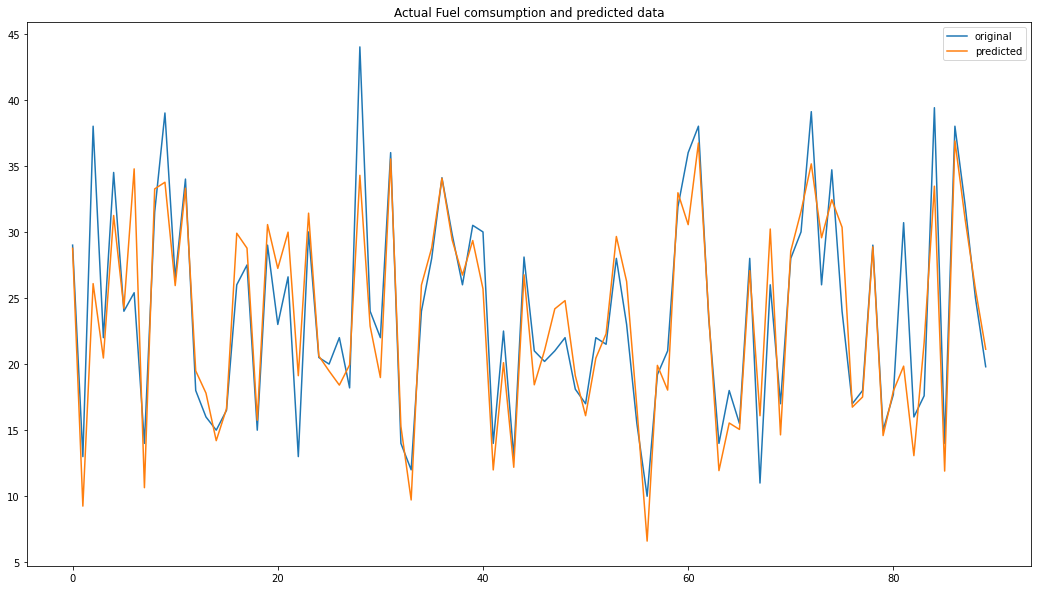

In [36]:
plt.figure(figsize=(18,10))
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, test_pred, label="predicted")
plt.title("Actual Fuel comsumption and predicted data")
plt.legend()
plt.show()

#### Using Decision Tree

In [37]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [38]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [39]:
print('RSquared value on train: {:.4f}'.format(DT.score(X_train, Y_train)))
print('RSquared value on test: {:.4f}'.format(DT.score(X_test, Y_test)))

RSquared value on train: 1.0000
RSquared value on test: 0.7568


In [40]:
print("The accuracy of this model on testing comes out as {:.2f}%".format(DT.score(X_test, Y_test)*100))

The accuracy of this model on testing comes out as 75.68%


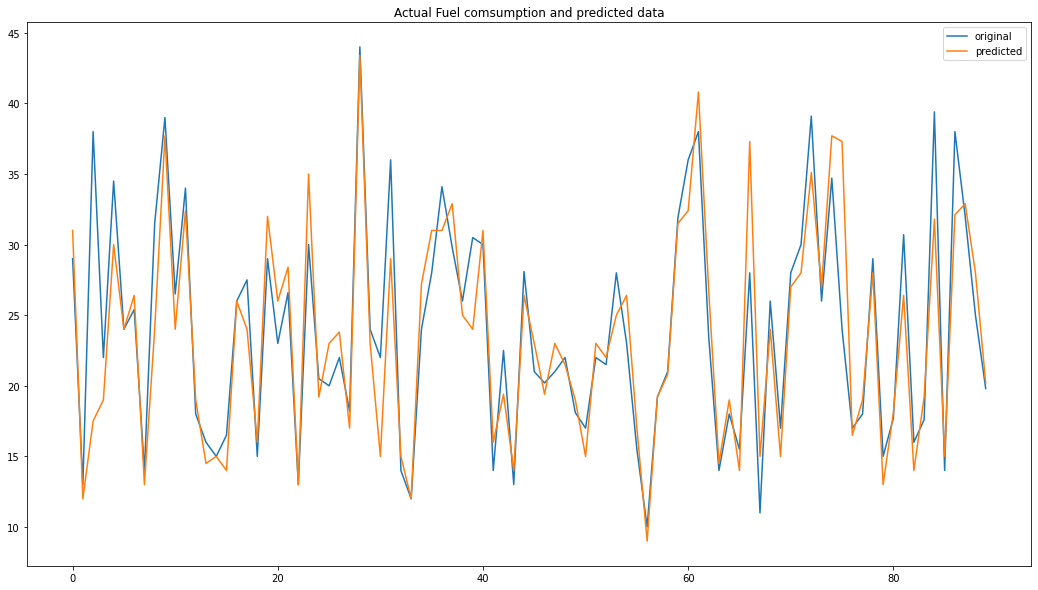

In [41]:
plt.figure(figsize=(18,10))
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, test_preds, label="predicted")
plt.title("Actual Fuel comsumption and predicted data")
plt.legend()
plt.show()